In [1]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import *
from model_Resnet import *
from model_Resnet_vgg import *
import torch
%matplotlib inline

In [2]:
from torchvision import datasets, transforms
transform=transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ]) 

In [3]:
#dataset 
root = 'UCF'
test = os.path.join(root,'test_data','images')
path_sets = [test]

In [4]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [5]:
# choose model 

model = ResNet(BasicBlock, [2, 2, 2, 2])
#model = CSRNet_res(BasicBlock)
#model = CSRNet()

In [6]:
model = model.cuda()

In [7]:
#load checkpoints 

#checkpoint = torch.load('0model_best.pth.tar') 
#checkpoint = torch.load('0checkpoint.pth.tar')
#checkpoint = torch.load('0checkpoint.pth.tar.372.pretrained.allowall')
#checkpoint = torch.load('0model_best.pth.tar.277.376.pretrained_allowall')
#checkpoint = torch.load('0model_best.192.265.vgg.pth.tar')
#checkpoint = torch.load('0checkpoint.pth.359.vgg.tar')
#checkpoint = torch.load('0model_best.pth.239.376.vgg_res18.tar')
#checkpoint = torch.load('0checkpoint.pth.290.vgg_res18.tar')
#checkpoint = torch.load('0model_best.pth.231.432.vggres34.tar')
#checkpoint = torch.load('0checkpoint.pth.345.vgg_res.tar')
#checkpoint = torch.load('0model_best.pth.297.366.accept70.tar')
#checkpoint = torch.load('0checkpoint.pth.356.accept70.tar')
#checkpoint = torch.load('0model_best.325.608.nodecay.pth.tar')
#checkpoint = torch.load('0checkpoint.pth.363.nodecay.tar')
#checkpoint = torch.load('0model_best.pth.277.376.pretrained_allowall.tar')
checkpoint = torch.load('0checkpoint.pth.372.pretrained.allowall.tar')

In [8]:
model.load_state_dict(checkpoint['state_dict'])

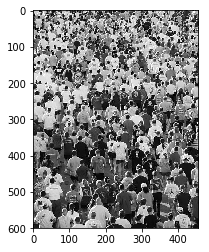

In [9]:
#show original image 
plt.imshow(Image.open(img_paths[3]))

326.09137
(600, 456)


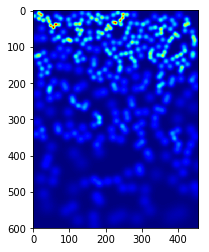

In [18]:
#show groundtruth
gt_file = h5py.File(img_paths[3].replace('.jpg','.h5').replace('images','ground_truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)


Resnet18_23
0 299.1363525390625
tensor(1656.6792, device='cuda:0')
1 600.5465087890625
tensor(1138.4520, device='cuda:0')
2 1138.6151123046875
tensor(1416.1813, device='cuda:0')
3 1347.5658569335938
tensor(535.0421, device='cuda:0')
4 1887.3444213867188
tensor(1811.0837, device='cuda:0')
5 2199.6653442382812
tensor(631.5801, device='cuda:0')
6 2775.135009765625
tensor(1156.1726, device='cuda:0')
7 3103.63623046875
tensor(1605.7830, device='cuda:0')
8 3485.870849609375
tensor(1981.3916, device='cuda:0')
9 3720.5872192382812
tensor(672.2469, device='cuda:0')
372.0587219238281


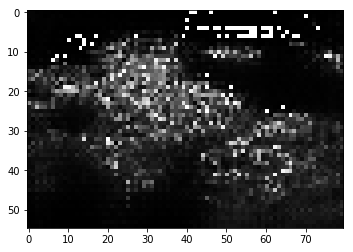

In [9]:
mae = 0
print('Resnet18_23')
for i in xrange(len(img_paths)):
#for i in xrange(1):
    
    # img = 255.0 * F.to_tensor(Image.open(img_paths[i]).convert('RGB'))
    # img[0,:,:]=img[0,:,:]-92.8207477031
    # img[1,:,:]=img[1,:,:]-95.2757037428
    # img[2,:,:]=img[2,:,:]-104.877445883 #Q7: what are these? #change to imagenet
    # img = img.cuda()
    img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground_truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    
    #show output 
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
    a = output.detach().cpu()
    a =a.squeeze()
    b = a.view(1,a.shape[0],a.shape[1])
    trans = transforms.ToPILImage()
    
    plt.imshow(trans(b))
    print i,mae
    print output.sum() # show output result 
print mae/len(img_paths)